# Convolutonal Neural Network (CNN)
## Using Keras deep learning package
<br> The Keras deep learning library provides a convenience method for loading the MNIST dataset.
<br> The dataset is downloaded automatically the first time this function is called and is stored in your home directory in ~/.keras/datasets/mnist.pkl.gz as a 15MB file.

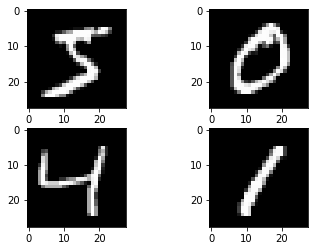

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Baseline MLP - Multi Layer Perceptron.

In [10]:
# Baseline MLP for MNIST dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Xtrain:{X_train.shape}, y_train:{y_train.shape}, X_test:{X_test.shape}, y_test:{y_test.shape}")

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(f"y_train:{y_train.shape}, y_test:{y_test.shape}, num_classes:{num_classes}")

# Define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add( Dense(num_pixels,input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add( Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline error: {100-scores[1]*100:0.2f}")

Xtrain:(60000, 28, 28), y_train:(60000,), X_test:(10000, 28, 28), y_test:(10000,)
y_train:(60000, 10), y_test:(10000, 10), num_classes:10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 4s - loss: 0.2816 - accuracy: 0.9205 - val_loss: 0.1398 - val_accuracy: 0.9582
Epoch 2/10
60000/60000 - 4s - loss: 0.1125 - accuracy: 0.9677 - val_loss: 0.0967 - val_accuracy: 0.9701
Epoch 3/10
60000/60000 - 4s - loss: 0.0725 - accuracy: 0.9793 - val_loss: 0.0788 - val_accuracy: 0.9761
Epoch 4/10
60000/60000 - 4s - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0726 - val_accuracy: 0.9767
Epoch 5/10
60000/60000 - 5s - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.0662 - val_accuracy: 0.9791
Epoch 6/10
60000/60000 - 5s - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0606 - val_accuracy: 0.9810
Epoch 7/10
60000/60000 - 6s - loss: 0.0194 - accuracy: 0.9952 - val_loss: 0.0625 - val_accuracy: 0.9814
Epoch 8/10
60000/60000 - 6s - loss: 0.0152 - accuracy: 0.9963 - val_loss: 0.0627 - v

## Simple CNN

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"CNN error: {100-scores[1]*100:0.2f}")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 440us/sample - loss: 0.2464 - accuracy: 0.9301 - val_loss: 0.0824 - val_accuracy: 0.9738
Epoch 2/10
60000/60000 [==============================] - 28s 459us/sample - loss: 0.0741 - accuracy: 0.9780 - val_loss: 0.0527 - val_accuracy: 0.9823
Epoch 3/10
60000/60000 [==============================] - 26s 437us/sample - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0438 - val_accuracy: 0.9850
Epoch 4/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 5/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0324 - val_accuracy: 0.9894
Epoch 6/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0306 - val_accuracy: 0.9889
Epoch 7/10
60000/60000 [====================